In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [11]:
# Load the datasets
aqua_csv = pd.read_csv('AQUASTAT Dissemination System.csv')
mie_csv = pd.read_csv('mie-1.0.csv')
cow_country_codes = pd.read_csv('COW_country_codes.csv')
micnames = pd.read_csv('ua-micnames-1.0.csv')

In [12]:
code_to_country = pd.Series(cow_country_codes.StateNme.values, index=cow_country_codes.CCode).to_dict()

In [13]:
mie_csv['ccode1'] = mie_csv['ccode1'].map(code_to_country)
mie_csv['ccode2'] = mie_csv['ccode2'].map(code_to_country)
mie_csv.head()

,micnum,eventnum,ccode1,ccode2,stmon,stday,styear,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,2,1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,3,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,4,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,4,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,4,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [14]:
mie_csv = mie_csv.rename(columns={'ccode1': 'Country'})
mie_csv = mie_csv.rename(columns={'ccode2': 'Target Country'})
aqua_csv = aqua_csv.rename(columns={'Area': 'Country'})
COW_Country_Codes = COW_Country_Codes.rename(columns={'StateNme':'Country'})
mie_csv = mie_csv.rename(columns={'styear': 'Year'})

In [15]:
conflict_name = pd.Series(micnames.micname.values, index= micnames.micnum).to_dict()

In [16]:
mie_csv['micnum'] = mie_csv['micnum'].map(conflict_name)
mie_csv.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,Alaska Boundary Dispute (1902),1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,Serbian and Austro-Hungarian Fighting over Alb...,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,British Attempts to Pass the Albanian Corfu Ch...,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,British Attempts to Pass the Albanian Corfu Ch...,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,British Attempts to Pass the Albanian Corfu Ch...,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [17]:
merged_df = pd.merge(mie_csv, aqua_csv, on=['Country', 'Year'])
merged_df.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,...,fatalmin2,fatalmax2,version,VariableGroup,Subgroup,Variable,Value,Unit,Symbol,IsAggregate
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1,-9,1983,1,-9,1983,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3,E,False


In [18]:
merged_df.to_csv('merged_df.csv')

In [21]:
columns_to_drop = ['sidea1', 'action', 'stmon', 'stday', 'endmon', 'endday', 'endyear', 'version', 'VariableGroup', 'Subgroup', 'fatalmin1', 'fatalmin2', 'IsAggregate', 'Symbol']
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]

if existing_columns_to_drop:
   merged_df = merged_df.drop(columns=existing_columns_to_drop)
else:
    print("No columns to drop.")

In [22]:
merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1983,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3


In [45]:
print(merged_df)

                                                  micnum  eventnum   Country  \
0      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
1      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
2      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
3      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
4      Thai-Cambodian-Vietnamese Border Conflict and ...        64  Thailand   
...                                                  ...       ...       ...   
21683                Preah Vihear Temple Conflict (2011)        22  Thailand   
21684                Preah Vihear Temple Conflict (2011)        22  Thailand   
21685                Preah Vihear Temple Conflict (2011)        22  Thailand   
21686                Preah Vihear Temple Conflict (2011)        22  Thailand   
21687                Preah Vihear Temple Conflict (2011)        22  Thailand   

      Target Country  Year  hostlev  fa

In [56]:
# Filter water stress data to include only the specific variable
keyword = 'Water Stress'
filtered_merged_df = merged_df[merged_df['Variable'].str.contains(keyword, na=False)]
filtered_merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit,Country_encoded
79,The War over Angola of 1975–1976,132,Angola,South Africa,1987,4,0,0,SDG 6.4.2. Water Stress,1.27321,%,2
82,NaN,47,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%,3
83,NaN,48,Afghanistan,Pakistan,1981,4,0,0,SDG 6.4.2. Water Stress,49.69101,%,3
84,NaN,49,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%,3
85,NaN,50,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%,3


In [61]:
# Encode 'Country' to numeric values (I didn't want to mess with your code above, Jason, to go back to COW codes)
filtered_merged_df.loc[:, 'Country_encoded'] = pd.factorize(filtered_merged_df['Country'])[0]
print(filtered_merged_df)

                                    micnum  eventnum      Country  \
79        The War over Angola of 1975–1976       132       Angola   
82                                     NaN        47  Afghanistan   
83                                     NaN        48  Afghanistan   
84                                     NaN        49  Afghanistan   
85                                     NaN        50  Afghanistan   
...                                    ...       ...          ...   
21663  Preah Vihear Temple Conflict (2011)        18     Thailand   
21669  Preah Vihear Temple Conflict (2011)        19     Cambodia   
21675  Preah Vihear Temple Conflict (2011)        20     Cambodia   
21681  Preah Vihear Temple Conflict (2011)        21     Thailand   
21687  Preah Vihear Temple Conflict (2011)        22     Thailand   

      Target Country  Year  hostlev  fatalmax1  fatalmax2  \
79      South Africa  1987        4          0          0   
82          Pakistan  1981        3          0   

In [62]:
# Calculate correlation between encoded 'Country' and 'Value'
correlation = filtered_merged_df[['Country_encoded', 'Value']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 Country_encoded     Value
Country_encoded         1.000000 -0.014013
Value                  -0.014013  1.000000


In [63]:
# Specific correlation value
correlation_value = correlation.loc['Country_encoded', 'Value']
print(f"Correlation between 'Country_encoded' and 'Value': {correlation_value}")

Correlation between 'Country_encoded' and 'Value': -0.014012962261841103


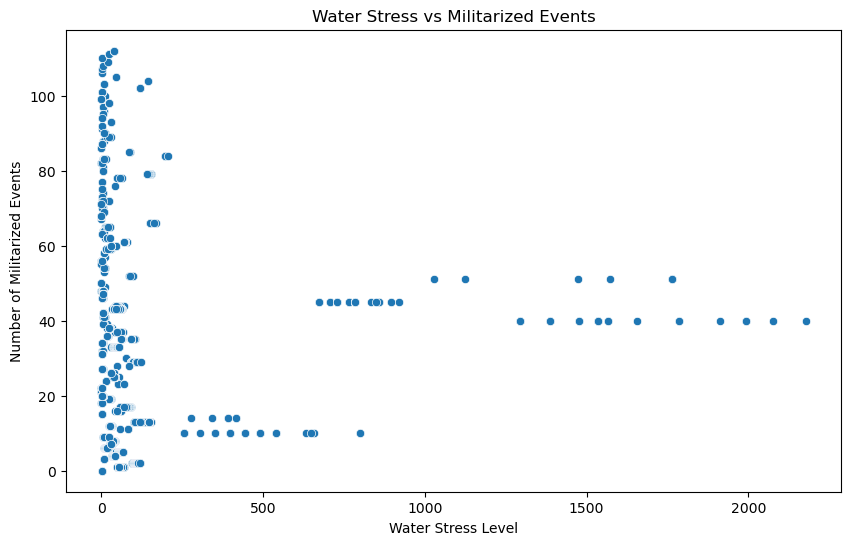

In [68]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_merged_df, x='Value', y='Country_encoded')
plt.title('Water Stress vs Militarized Events')
plt.xlabel('Water Stress Level')
plt.ylabel('Number of Militarized Events')
plt.show()

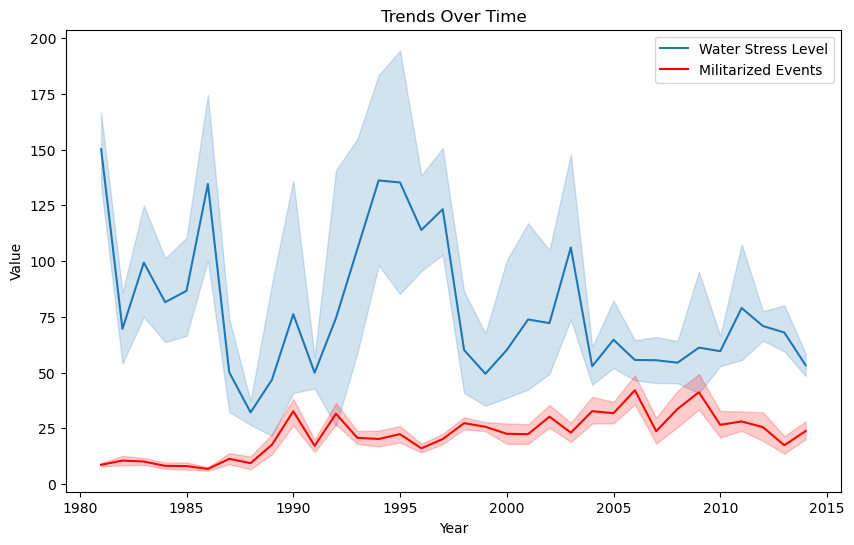

In [70]:
# Additional visualizations (e.g., trend over time)
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_merged_df, x='Year', y='Value', label='Water Stress Level')
sns.lineplot(data=filtered_merged_df, x='Year', y='Country_encoded', label='Militarized Events', color='red')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()